In [12]:
import functools
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_blobs, make_classification
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [13]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [14]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [35]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [15]:
df_train.dtypes

Unnamed: 0                   int64
NU_INSCRICAO                object
NU_ANO                       int64
CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_IDADE                     int64
TP_SEXO                     object
TP_ESTADO_CIVIL            float64
TP_COR_RACA                  int64
TP_NACIONALIDADE             int64
CO_MUNICIPIO_NASCIMENTO    float64
NO_MUNICIPIO_NASCIMENTO     object
CO_UF_NASCIMENTO           float64
SG_UF_NASCIMENTO            object
TP_ST_CONCLUSAO              int64
TP_ANO_CONCLUIU              int64
TP_ESCOLA                    int64
TP_ENSINO                  float64
IN_TREINEIRO                 int64
CO_ESCOLA                  float64
CO_MUNICIPIO_ESC           float64
NO_MUNICIPIO_ESC            object
CO_UF_ESC                  float64
SG_UF_ESC                   object
TP_DEPENDENCIA_ADM_ESC     float64
TP_LOCALIZACAO_ESC         float64
TP_SIT_FUNC_ESC     

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [17]:
df_train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [18]:
df_train['IN_TREINEIRO'].isna().sum()

0

In [19]:
df_train['IN_TREINEIRO'].dtypes

dtype('int64')

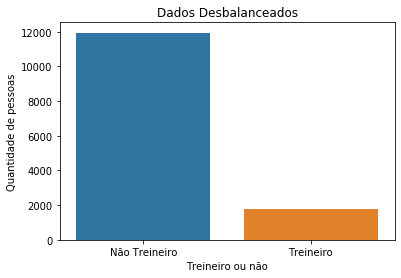

In [20]:
sns.countplot(x='IN_TREINEIRO', data=df_train)

plt.title('Dados Desbalanceados')
plt.xticks([0, 1], ['Não Treineiro', 'Treineiro'])
plt.xlabel('Treineiro ou não')
plt.ylabel('Quantidade de pessoas')
plt.show()

In [ ]:
'''shuffled_df = df_train.sample(frac=1,random_state=4)

trainee_df = shuffled_df.loc[shuffled_df['IN_TREINEIRO'] == 1]

non_trainee_df = shuffled_df.loc[shuffled_df['IN_TREINEIRO'] == 0].sample(n=1783,random_state=42)

normalized_df = pd.concat([trainee_df, non_trainee_df])

#plotando dados balanceados
sns.countplot('IN_TREINEIRO', data=normalized_df)
plt.title('Dados Balanceados')
plt.xticks([0, 1], ['Não Treineiro', 'Treineiro'])
plt.xlabel('Treineiro ou não')
plt.ylabel('Quantidade de pessoas')
plt.show()'''

In [21]:
df_train.corr(method='spearman')['IN_TREINEIRO'].sort_values().head(10)

NU_IDADE                  -0.535499
TP_ANO_CONCLUIU           -0.344331
TP_ESCOLA                 -0.258023
IN_CERTIFICADO            -0.142185
TP_ESTADO_CIVIL           -0.124211
Q030                      -0.103283
Q036                      -0.065569
Q035                      -0.064787
Q033                      -0.057982
CO_MUNICIPIO_RESIDENCIA   -0.056405
Name: IN_TREINEIRO, dtype: float64

In [22]:
df_train.corr(method='spearman')['IN_TREINEIRO'].sort_values(ascending=False).head(10)

IN_TREINEIRO       1.000000
TP_ST_CONCLUSAO    0.536272
TP_PRESENCA_CN     0.094805
TP_PRESENCA_CH     0.094805
TP_PRESENCA_LC     0.092589
TP_PRESENCA_MT     0.092589
Q005               0.047532
Q034               0.040846
Q039               0.040808
Q038               0.012313
Name: IN_TREINEIRO, dtype: float64

In [24]:
x = df_train[['NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_ST_CONCLUSAO']]
y = df_train[['IN_TREINEIRO']]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [26]:
smt = SMOTE(random_state=43)

x_balanced, y_balanced = smt.fit_resample(x_train, y_train)

In [31]:
rf = RandomForestClassifier()

rf.fit(x_balanced, y_balanced)

C:\Users\gnach\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [34]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
x_answer = df_test[['NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_ST_CONCLUSAO']]
predictions = rf.predict(x_answer)

predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
df_test['IN_TREINEIRO'] = predictions

In [41]:
df_answer = df_test[['NU_INSCRICAO', 'IN_TREINEIRO']]

In [42]:
df_answer.to_csv('answer.csv')